# 1 线性模型
线性模型是最简单的模型，我们将通过一个简单的例子来直观感受这个模型。我们有一个数据集，数据集关于房价，我们根据房屋面积的大小，画出我们的数据集，如下图所示。然后我们可以画出一个模型，也许是个直线，然后根据房屋面积大小预测房子的价钱。
![Alt text](Images/1.jpg)
### 1.1 基本形式
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
给定由$d$个属性描述的示例$x=(x_1;x_2;...;x_d)$,其中$x_i$指的是$x$在第$i$个属性上的取值，则线性模型(Linear model)则试图学得通过属性进行预测的函数，即
$$f(x)=w_1x_1+w_2x_2+...+w_dx_d+b （1）$$
一般向量形式为
$$f(x)=w^Tx+b (2)$$
### 1.2 代价函数（Cost function）
在线性回归中，我们有$m$个数据集，而我们通过这些数据集学得到线性函数：$f(x)=w^Tx+b$,然而事实上我们初始并不知道$f(x)$的参数值，我们将通过代价函数来确定模型函数$f(x)$的参数值。代价函数（Cost function）描述的是训练集参数模型的预测值与实际值之间的差距，或称误差函数（error function）或损失函数（loss function)。

![误差](Images/2.jpg)

如何确定$f(x)$中的$w,b$,关键在于使$f(x)$与$y$之间的差距最小，即代价函数最小，均方误差是在回归任务中最常见的性能度量，因而我们均方误差的代价函数，并使代价函数最小化。
$$E_(w,b)=1/m\sum_{i=1}^n(f(x_i)-y_i)^2=1/m\sum_{i=1}^n(w_ix_i+b-y_i)^2  (3)$$

三维线性模型的代价函数是个如下图所示：

![代价函数可视化](Images/3.jpg)

可以看出三维空间中存在一个最低点，即是我们要求的的参数目标。求取代价函数最小值有多种方法，在最小值位置，代价函数的各个方向的导数值均为零。因而可以使公式（3）对各个变量求导，然后等于0即可求出$w,b$。
$$ \frac{\partial E_(w,b)}{\partial w_i} = 0 （4）$$
然而许多代价函数并没有解析解，因而公式（4）存在很大的问题，许多情况并不能得到相应的解。因而在最小化代价函数时常用的数值计算的方法，比如梯度下降、牛顿法等，这将在数值计算中阐述，此章节并不作为重点。梯度下降公式为：
$$ w_i = w_i-\alpha\frac{\partial E_(w,b)}{\partial w_i}$$
$\alpha$为学习率。

## 1.3 举例说明线性模型求解

In [4]:
#导入相关库
%matplotlib inline
import sklearn
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np

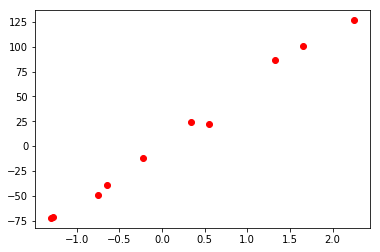

In [155]:
# 利用sklearn.datasets.make_regression获取线性回归数据集

x, y = make_regression(n_samples=10, n_features=1, n_targets=1, noise=6)
plt.scatter(x, y, c='r')

In [156]:
# 定义线性模型函数和代价函数

def model(x, w):
    return w*x

def cost(x, y, w):
    m = len(x)
    error = 0
    for xi, yi in zip(x, y):
        error = error + (model(xi, w)-yi)*(model(xi, w)-yi)
    return error/m
    

In [157]:
# 定义梯度下降函数求解

def GradientDescent(x, y, w, alpha):
    tem = [w]
    eps = 10
    while abs(eps) > 0.1:
        g = (cost(x, y, w+0.01)-cost(x, y, w-0.01))/0.02
        w = w - g*alpha
        eps = w - tem[-1]
        tem.append(w)
    return tem

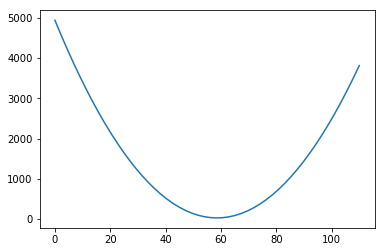

In [158]:
# 代价函数可视化

error = []
error_w = np.linspace(0, 110, 50)
for w in error_w:
    error.append(cost(x, y, w))
plt.plot(error_w ,error)

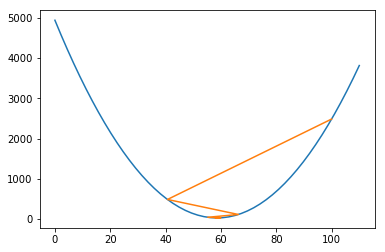

In [165]:
# 梯度下降可视化（学习率为0.5），w初始值为100

tem = GradientDescent(x, y, 100, 0.5)
plt.plot(error_w , error)
plt.plot(tem, cost(x, y, tem))


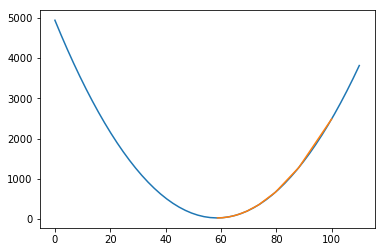

In [160]:
# 梯度下降可视化（学习率为0.1），w初始值为100

tem = GradientDescent(x, y, 100, 0.1)
plt.plot(error_w , error)
plt.plot(tem, cost(x, y, tem))

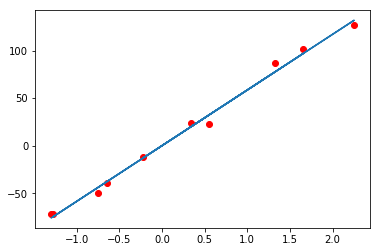

In [166]:
# 梯度下降所求得的模型，并与原数据进行比较

plt.scatter(x, y, c='r')
plt.plot(x, x*tem[-1])

## 利用sklearn库实现线性回归

In [3]:
# 导入LinearRegression模块
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

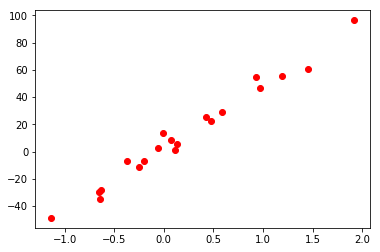

In [9]:
x, y = make_regression(n_samples=20, n_features=1, n_targets=1, noise=7)
plt.scatter(x, y, c='r')

In [10]:
# 建立LinearRegression模型

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

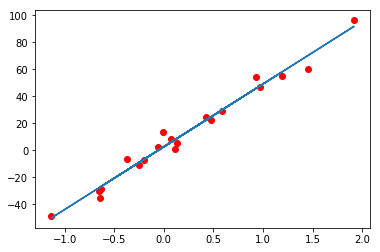

In [11]:
plt.scatter(x, y, c='r')
plt.plot(x, y_pred)